In [327]:
%matplotlib inline
import numpy as np
import math
from scipy.optimize import curve_fit
from scipy.special import factorial
import matplotlib.pyplot as plt

In [326]:
def poisson(lbda, t,n):
    return math.exp(-lbda*t)*(lbda*t)**(n)/factorial(n)

In [340]:
def ocorrencias(lbda, tmax = 0, n = 0):    
    ocurr = 0
    nocurr = []
    tocurr = []
    te = 0
    ne = 0
    if tmax == 0:
        for i in range(n):
            ti = np.random.exponential(1/lbda)
            te = te + ti
            ne += 1
            tocurr.append(te)
            nocurr.append(ne)
    else:
        while(True):
            ti = np.random.exponential(1/lbda)
            te = te + ti
            ne += 1
            if(te>=tmax):
                break
            tocurr.append(te)
            nocurr.append(ne)
            ocurr += 1
    return {'ocurr': ocurr, 'tocurr': tocurr, 'nocurr': nocurr}

In [344]:
def simula(lbda, t, n, Nmax):
    vprob = []
    vsim = []
    vocorr = []
    
    for nsim in np.arange(10,Nmax,10):
        ok = 0 
        ocorr = 0
        for j in range(1,nsim):
            ret = ocorrencias(lbda,tmax=t)
            ocorr += ret['ocurr']
            if ret['ocurr'] == n:
                ok = ok + 1
        vprob.append(ok/nsim)
        vsim.append(nsim)
        vocorr.append(ocorr)
    return {'vsim': vsim, 'vprob':vprob, 'vocorr': vocorr}


In [125]:
lbda = 10
t = 1
n = 10
sim = simula(lbda, t, n, 5000)

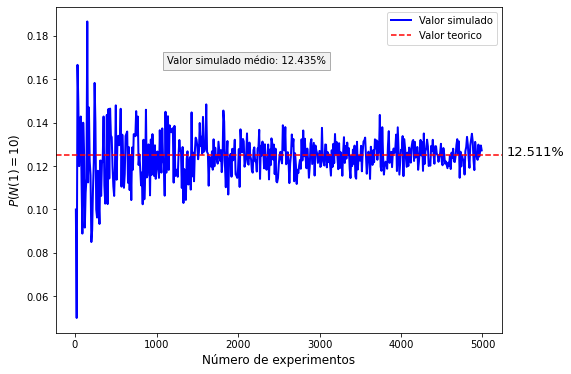

In [127]:
Nmax = 5000
plt.figure(figsize = (8,6))
plt.plot(sim['vsim'],sim['vprob'], linestyle = '-', color='blue', linewidth =2, label = 'Valor simulado')
plt.axhline(y=poisson(lbda,t,n), color='r', linestyle ='--', label = 'Valor teorico')
plt.ylabel(f"$P(N({t}) = {n})$", fontsize=12)
plt.xlabel("Número de experimentos", fontsize = 12)
text = "Valor simulado médio: "+"{:.3%}".format(np.mean(sim['vprob']))

plt.gca().text(0.25, 0.85, text,transform=plt.gca().transAxes,
     bbox=dict(facecolor='lightgrey', alpha=0.3), verticalalignment='top')

plt.text(Nmax+300,poisson(lbda,t,n),"{:.3%}".format(poisson(lbda,t,n)), fontsize = 13)
plt.legend()
plt.show(True)

In [294]:
lbda = 5
t = 2
n = 15
nexp = np.arange(10,3000,1)
vprobmed = []

for exp in nexp:
    sim = simula(lbda, t, n, exp)
    vprobmed.append(np.mean(sim['vprob'][1:]))

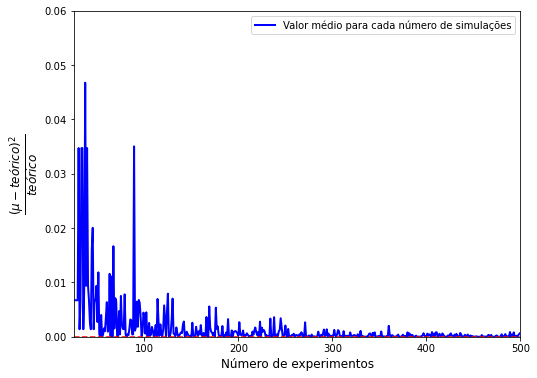

In [304]:
plt.figure(figsize = (8,6))
plt.plot(nexp,[(i -poisson(lbda,t,n))**2/poisson(lbda,t,n) for i in  vprobmed], linestyle = '-', color='blue', linewidth =2, label = 'Valor médio para cada número de simulações')
plt.axhline(y=0, color='r', linestyle ='--')
plt.ylabel(r"$\dfrac{(\mu-teórico)^2}{teórico}$", fontsize=12)
plt.xlabel("Número de experimentos", fontsize = 12)
plt.xlim(25,500)
plt.ylim(0,0.06)


#plt.text(Nmax+300,poisson(lbda,t,n),"{:.3%}".format(poisson(lbda,t,n)), fontsize = 13)
plt.legend()
plt.show(True)

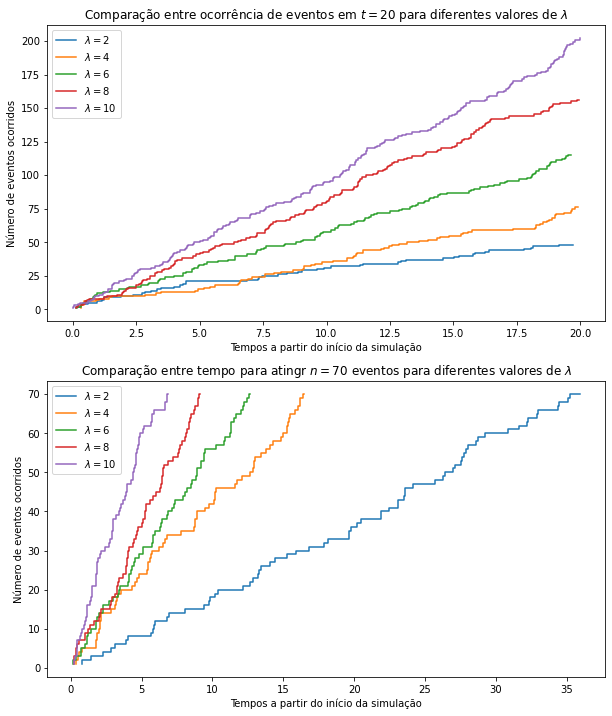

In [313]:
lbda = np.arange(2,11,2)
t = 20
n = 70
rets = []
fig, axs = plt.subplots(2,1,figsize=(10,12))

for l in lbda:
    ret1 = ocorrencias(l,t=t)
    ret2 = ocorrencias(l,n=n)
    rets.append({'t': ret1, 'n': ret2})
    axs[0].set_title(f"Comparação entre ocorrência de eventos em $t = {t}$ para diferentes valores de $\lambda$")
    axs[0].step(ret1['tocurr'], ret1['nocurr'], label = f'$\lambda = {l}$')
    axs[0].set_xlabel("Tempos a partir do início da simulação")
    axs[0].set_ylabel("Número de eventos ocorridos")
    axs[0].legend()
    
    axs[1].set_title(f"Comparação entre tempo para atingr $n = {n}$ eventos para diferentes valores de $\lambda$")
    axs[1].step(ret2['tocurr'], ret2['nocurr'], label = f'$\lambda = {l}$')
    axs[1].set_xlabel("Tempos a partir do início da simulação")
    axs[1].set_ylabel("Número de eventos ocorridos")
    axs[1].legend()
    

plt.show(True)


In [314]:
lbda = np.arange(1,100,0.01)
t = 20
n = 70
rets = []

for l in lbda:
    ret1 = ocorrencias(l,t=t)
    ret2 = ocorrencias(l,n=n)
    rets.append({'t': ret1, 'n': ret2})


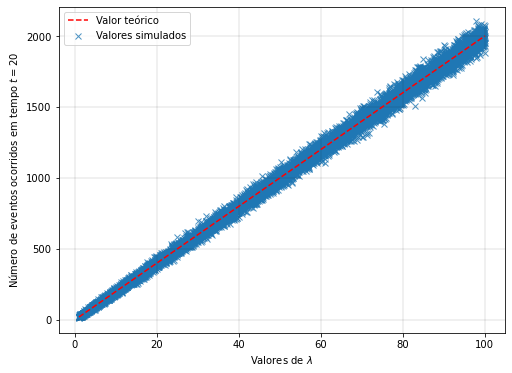

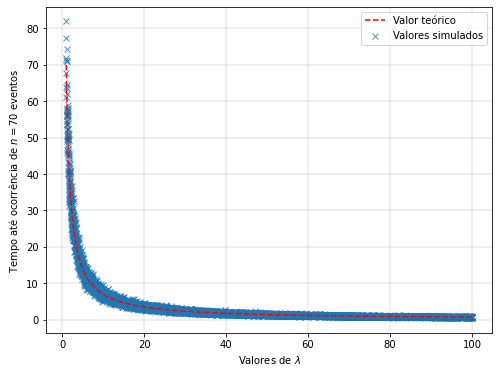

In [323]:
plt.figure(figsize = (8,6))
plt.scatter(lbda, [j['t']['ocurr'] for j in rets], marker = 'x', alpha = 0.8,linewidths=1, label="Valores simulados")
plt.grid(color='black', linestyle='-', linewidth=0.4, alpha = 0.3)
plt.plot(lbda,[t*l for l in lbda],"r--",label = 'Valor teórico')
plt.ylabel("Número de eventos ocorridos em tempo $t = 20$")
plt.xlabel(r"Valores de $\lambda$")
plt.legend()


plt.figure(figsize = (8,6))
plt.scatter(lbda, [j['n']['tocurr'][-1] for j in rets],marker = 'x', alpha = 0.8,linewidths=1, label="Valores simulados")
plt.plot(lbda,[n/l for l in lbda], 'r--', label = 'Valor teórico' )
plt.grid(color='black', linestyle='-', linewidth=0.4, alpha = 0.3)
plt.ylabel("Tempo até ocorrência de $n = 70$ eventos")
plt.xlabel(r"Valores de $\lambda$")
plt.legend()

plt.show(True)

In [378]:
lbda = 5
t = 4
n = 10
nsim = 5000

prob = []
ocor = {}

for sim in range(0,nsim):
    oc = ocorrencias(lbda,tmax=t)
    
    if oc['ocurr'] in ocor:
        ocor[oc['ocurr']] += 1
    else:
        ocor[oc['ocurr']] = 1


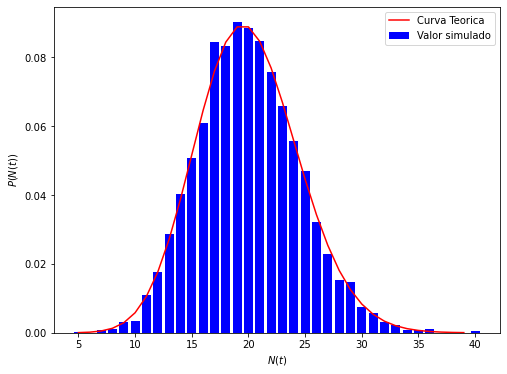

In [380]:
plt.figure(figsize=(8,6))

plt.bar(ocor.keys(),[i/nsim for i in ocor.values()], label = 'Valor simulado', color='blue')

x = range(np.min(list(ocor.keys())),np.max(list(ocor.keys())))
P = []
for k in x:
    prob = (np.exp(-lbda*t)*(lbda*t)**k)/factorial(k)
    P.append(prob)
plt.plot(x,P, color = 'red', label='Curva Teorica')
plt.xlabel("$N(t)$")
plt.ylabel("$P(N(t))$")
plt.legend()
plt.show(True)